#### Notebook 4
- Make graphics for the verification, anomaly, and score files

In [1]:
%load_ext autoreload
%autoreload 2

import cartopy
from matplotlib import cm
from matplotlib.colors import BoundaryNorm
import numpy as np
import util
import xarray as xr

##### Variable options

verif_type:
- monthly or seasonal

var_type:
- single or pressure

var:
- single: t2m, prec
- pressure: t, relhum, geopotential

level:
- 925, 850, False

In [266]:
anom_type = 'monthly'
verif_type = 'monthly'
var_type = 'single'
var = 't2m'
level = False
prepath = 'data/post_processed/'
unit = util.unit_map[var]

In [267]:
# for plotting purposes
if var_type == 'pressure':
    var_merged = var+str(level)
elif var_type == 'single':
    var_merged = var

In [268]:
var_merged

't2m'

In [259]:
prj_pole_lon = util.ModelProj().pole_longitude
prj_pole_lat = util.ModelProj().pole_latitude

crs_parameters = {'pole_longitude': prj_pole_lon,
                  'pole_latitude': prj_pole_lat,
                  }

In [243]:
da_pp = util.get_post_processed_verif_files(verif_type, var_type, 
                                            var, level, prepath)[var]

In [244]:
print(int(da_pp.min()) - int(da_pp.min())%10)
print(int(da_pp.max()) + (10-int(da_pp.max())%10))

-440
1020


##### Monthly Verification Graphs

Sample monthly vmin-vmax values
- prec : -200, 200 --> +50
- t2m: -8, 8 --> +2
- t-850: -8, 8 --> +2
- relhum-850: -30, 30 --> +5
- relhum-925: -30, 30 --> +5

cmap options: seismic, BrBG (mostly relhum and prec), coolwarm(mostly temp)

In [49]:
# Parameters to change (plot) -------------------
cmap = cm.get_cmap('BrBG')
vmin = -30 # consider lower limit above
vmax = 30 # upper bound consider upper limit above
thresh = 5
norm = BoundaryNorm(np.arange(vmin, vmax+thresh, thresh), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+thresh, thresh)
# -----------------------

# graphic features
fig_array = [[1,2,3],
             [4,5,6],
             [7,8,9]]

graphic_no = 9 # number of subfigures

# projection
crs_data = cartopy.crs.RotatedPole(**crs_parameters)

method='Month'
difference_method = 'Model-ERA5'

/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)
/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)


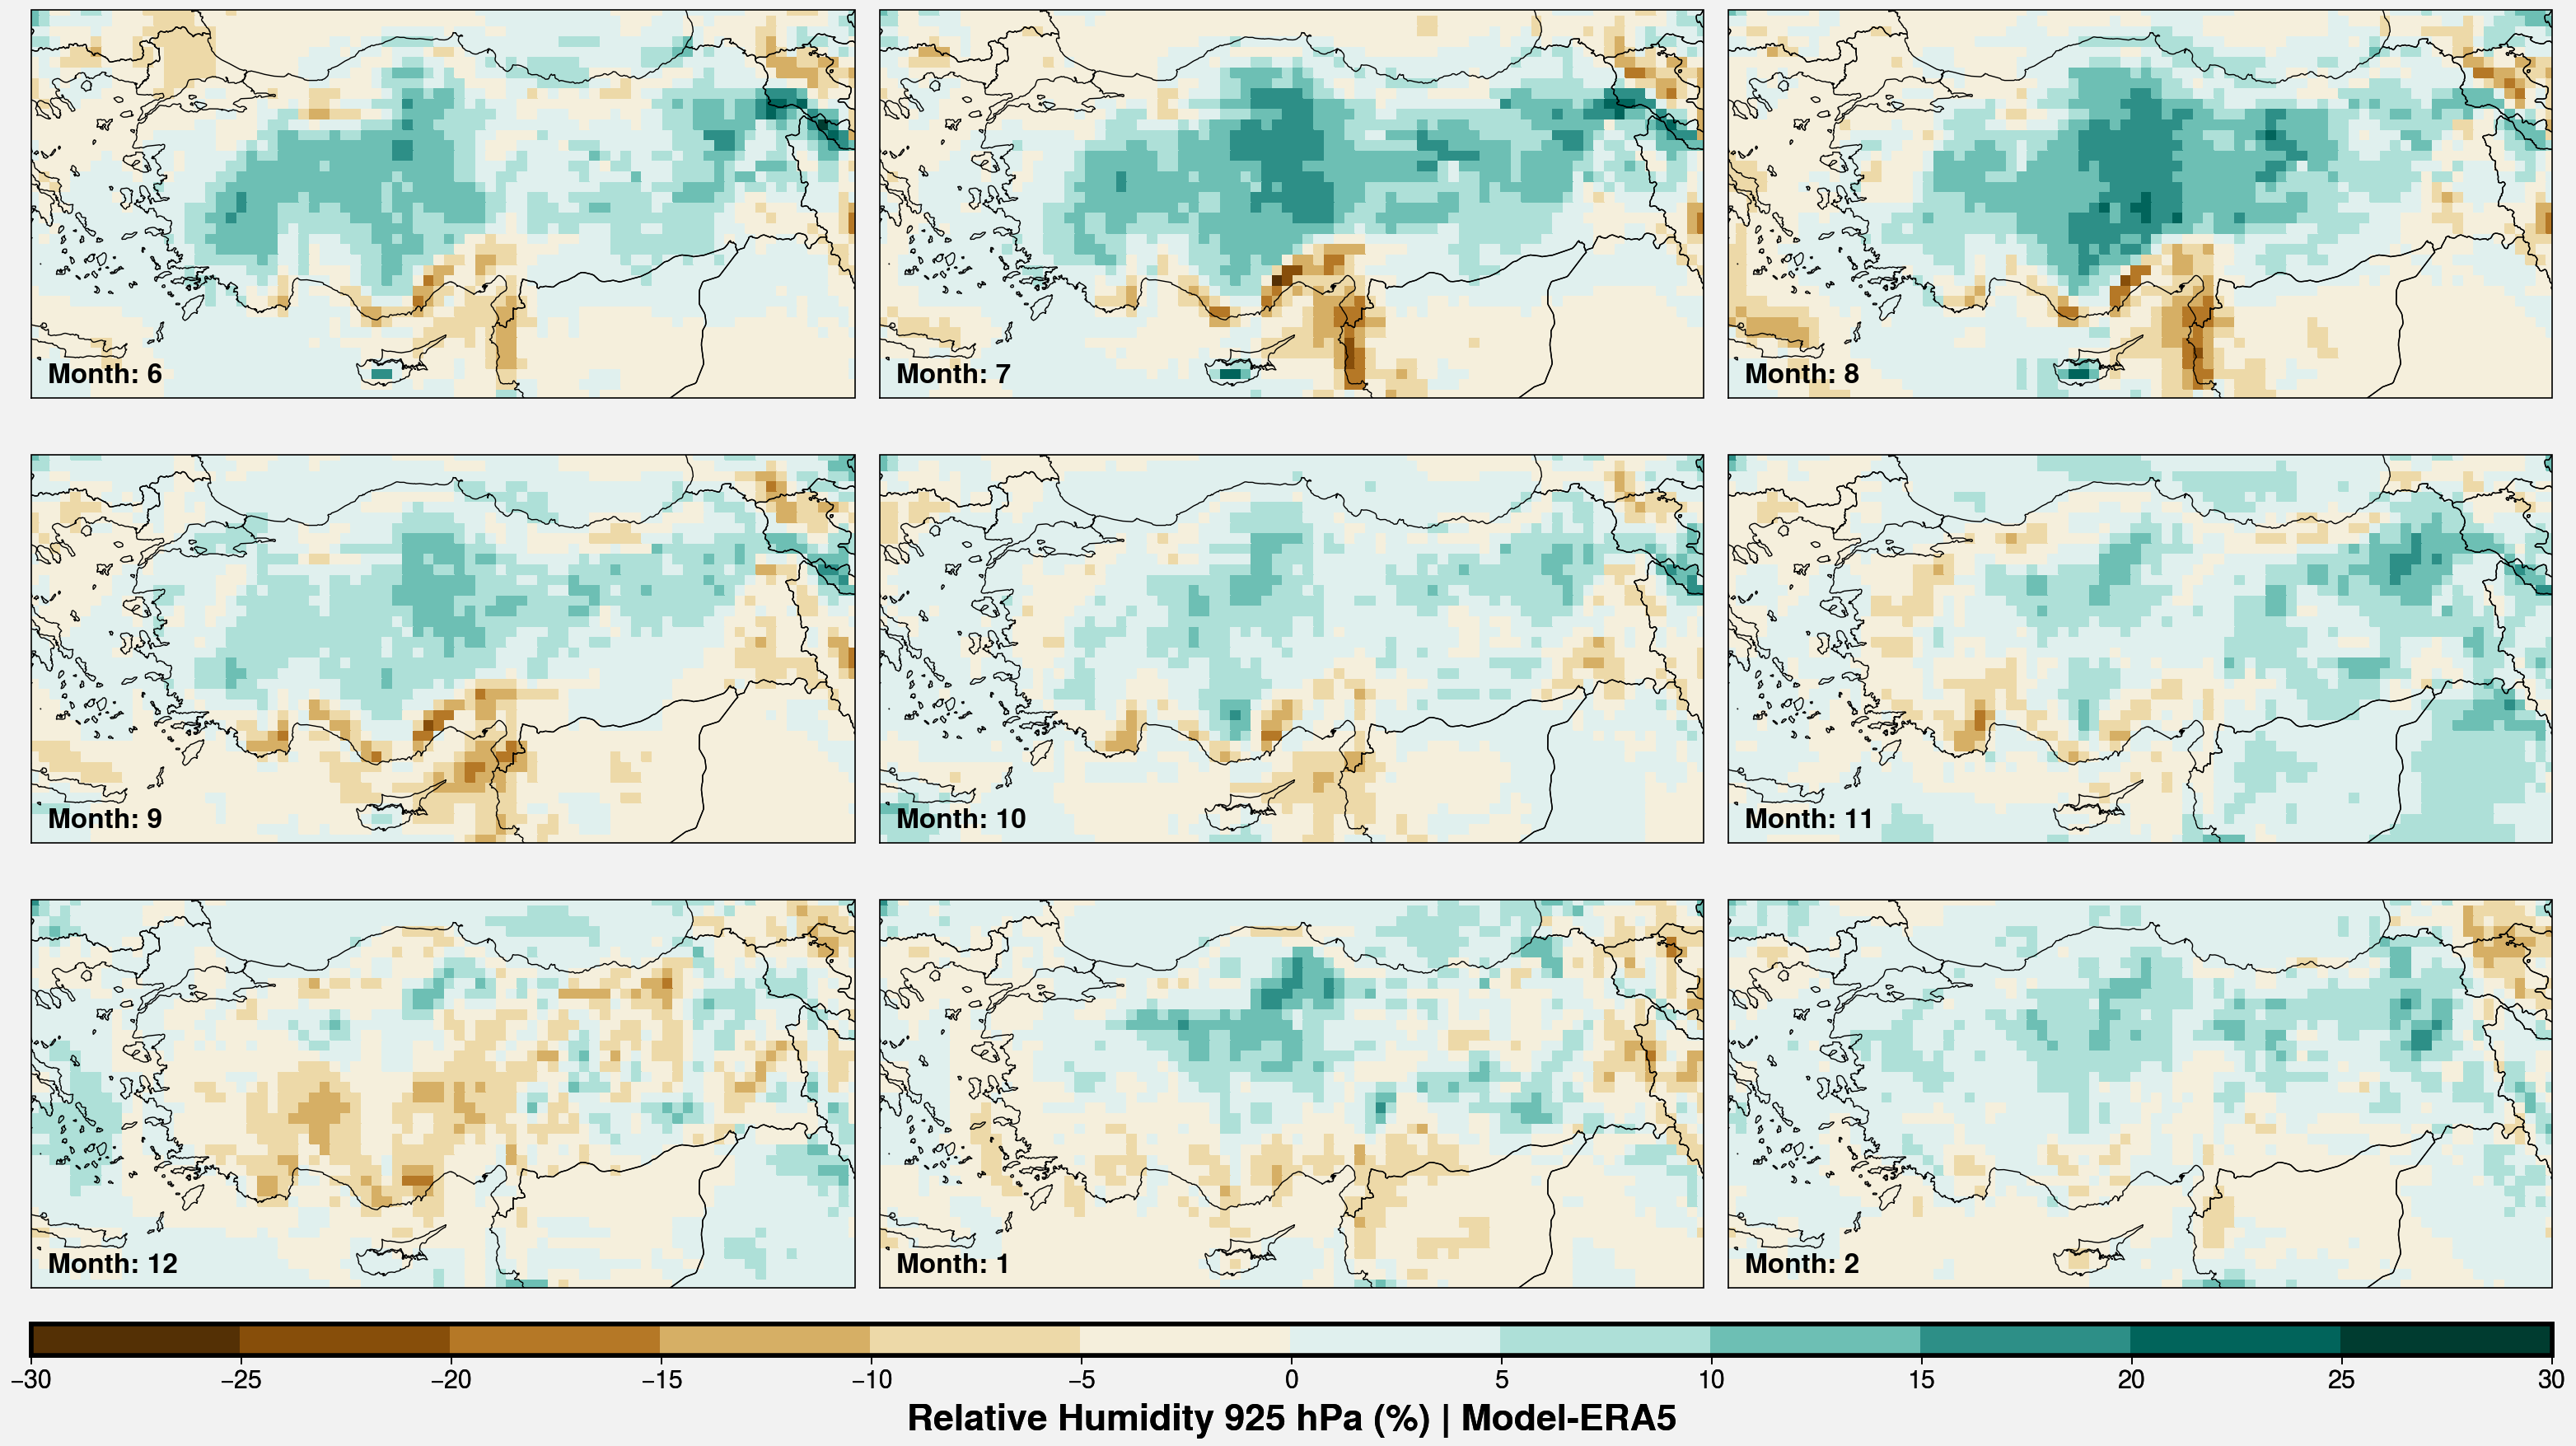

In [50]:
util.plot_verif_map(da_pp, var_merged, cmap, vmin, vmax, norm, ticks,
                    crs_data, graphic_no, util.graph_field_map[var_merged], 
                    method, difference_method, fig_array, unit)

##### Seasonal Verification Graphs

Sample seasonal vmin-vmax values
- prec : -200, 200 --> +50
- t2m: -8, 8 --> +2
- t-850: -8, 8 --> +2
- relhum-850: -30, 30 --> +5
- relhum-925: -30, 30 --> +5 

cmap options: seismic, BrBG (mostly relhum and prec), coolwarm(mostly temp)

In [103]:
# Parameters to change (plot) -------------------
cmap = cm.get_cmap('BrBG')
vmin = -30 # consider lower limit above
vmax = 30 # upper bound consider upper limit above
thresh = 5
norm = BoundaryNorm(np.arange(vmin, vmax+thresh, thresh), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+thresh, thresh)
# -----------------------

# graphic features
fig_array = [[1,2,3]]

graphic_no = 3 # number of subfigures

# projection
crs_data = cartopy.crs.RotatedPole(**crs_parameters)

method='Season'
difference_method = 'Model-ERA5'

In [104]:
da_pp_sorted = da_pp.sel(season=['JJA', 'SON', 'DJF'])

/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)
/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)


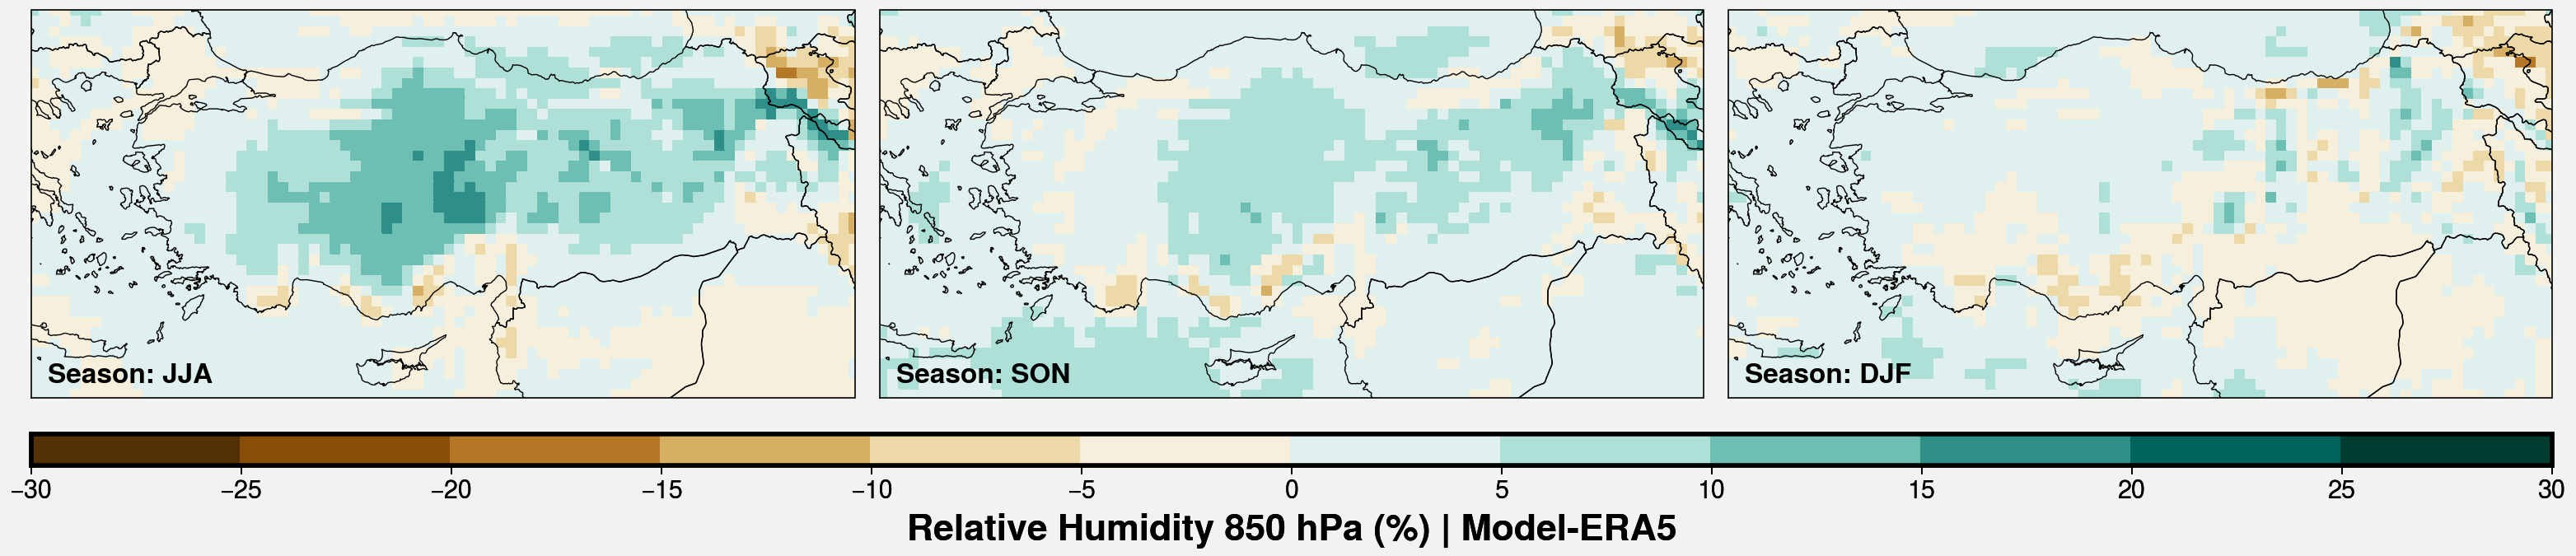

In [105]:
util.plot_verif_map(da_pp_sorted, var_merged, cmap, vmin, vmax, norm, ticks,
                    crs_data, graphic_no, util.graph_field_map[var_merged], method, difference_method, fig_array, unit)

##### Scores Graphs

Sample scores vmin-vmax values
- prec : 0, 100 --> +10
- t2m: 0, 3 --> +0.5

In [129]:
score_pp = util.get_post_processed_score_files(var_type, var, level, prepath)

In [136]:
score_pp.max()['rmse']

<xarray.DataArray 'rmse' ()>
array(371.40789795)
Coordinates:
    rotated_pole  int64 0
    spatial_ref   int64 0

In [130]:
for i in score_pp.data_vars:
    print(i)

rmse
mae
corr


In [133]:
# Parameters to change (plot) -------------------
cmap = cm.get_cmap('summer')
vmin = 0 # consider lower limit above
vmax = 100 # upper bound consider upper limit above
thresh = 10
norm = BoundaryNorm(np.arange(vmin, vmax+thresh, thresh), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+thresh, thresh)
# -----------------------

# graphic features
fig_array = [[1]]

graphic_no = 1 # number of subfigures

# projection
crs_data = cartopy.crs.RotatedPole(**crs_parameters)

method='Score'
difference_method = 'Model-ERA5'

/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)
/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)


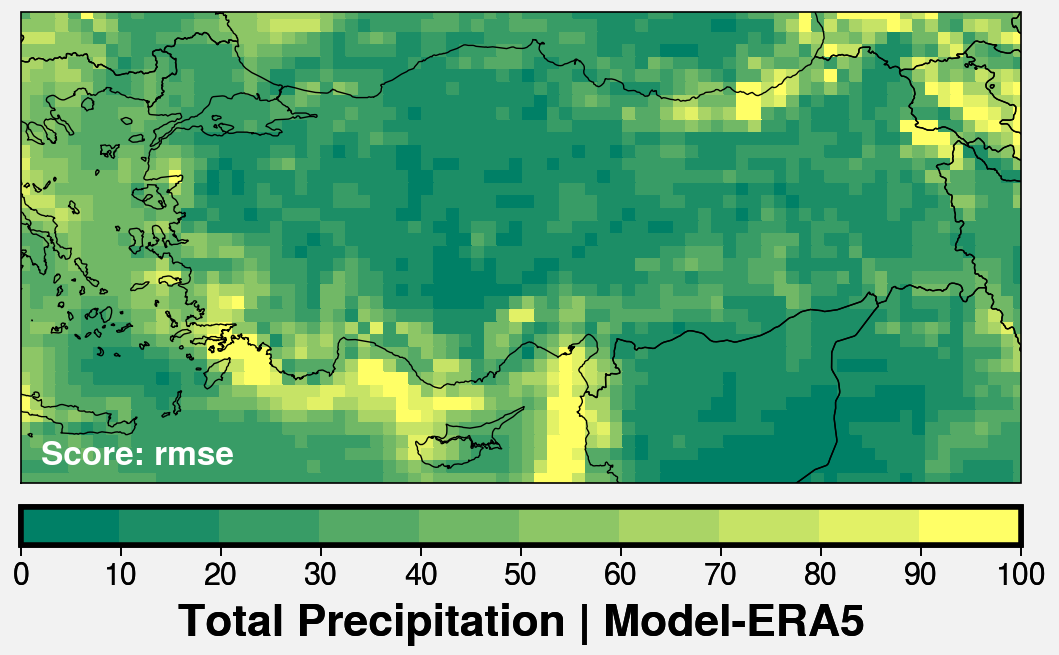

In [134]:
util.plot_score_map(score_pp, var_merged, cmap, vmin, vmax, norm, ticks,
                    crs_data, graphic_no, util.graph_field_map[var_merged], method, difference_method, fig_array, unit)

##### Anomaly Graphs

Sample anomaly vmin-vmax values
For monthly:
- prec : -150, 150 --> +30
- t2m: -5, 5 --> +1

For seasonal:
- prec: -100, 100 --> +20
- t2m: -3, 3 --> + 0.5

In [269]:
anom_pp = util.get_post_processed_anomaly_files(anom_type, prepath)[util.era_field_map[var]]

In [270]:
if anom_type=='monthly':
    anom_pp = anom_pp.sel(month=[6,7,8,9,10,11,12,1,2]) # from 2018 month 6 to 2019 month 2
elif anom_type=='seasonal':
    anom_pp = anom_pp.sel(season=['JJA', 'SON', 'DJF'])    

In [271]:
print(anom_pp.max().values)
print(anom_pp.min().values)

5.996368408203125
-5.12744140625


cmap options: seismic, BrBG (prec), PuOr_r(temp)

In [275]:
# Parameters to change (plot) -------------------
cmap = cm.get_cmap('PuOr_r')
vmin = -5 # consider lower limit above
vmax = 5 # upper bound consider upper limit above
thresh = 1
norm = BoundaryNorm(np.arange(vmin, vmax+thresh, thresh), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+thresh, thresh)
# -----------------------

# graphic features
fig_array = [[1,2,3],
             [4,5,6],
             [7,8,9]]

graphic_no = 9 # number of subfigures

# projection
crs_data = cartopy.crs.RotatedPole(**crs_parameters)

method='Month'

/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)
/home/berkaydonmez/anaconda3/envs/cirrus_env_v3/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)


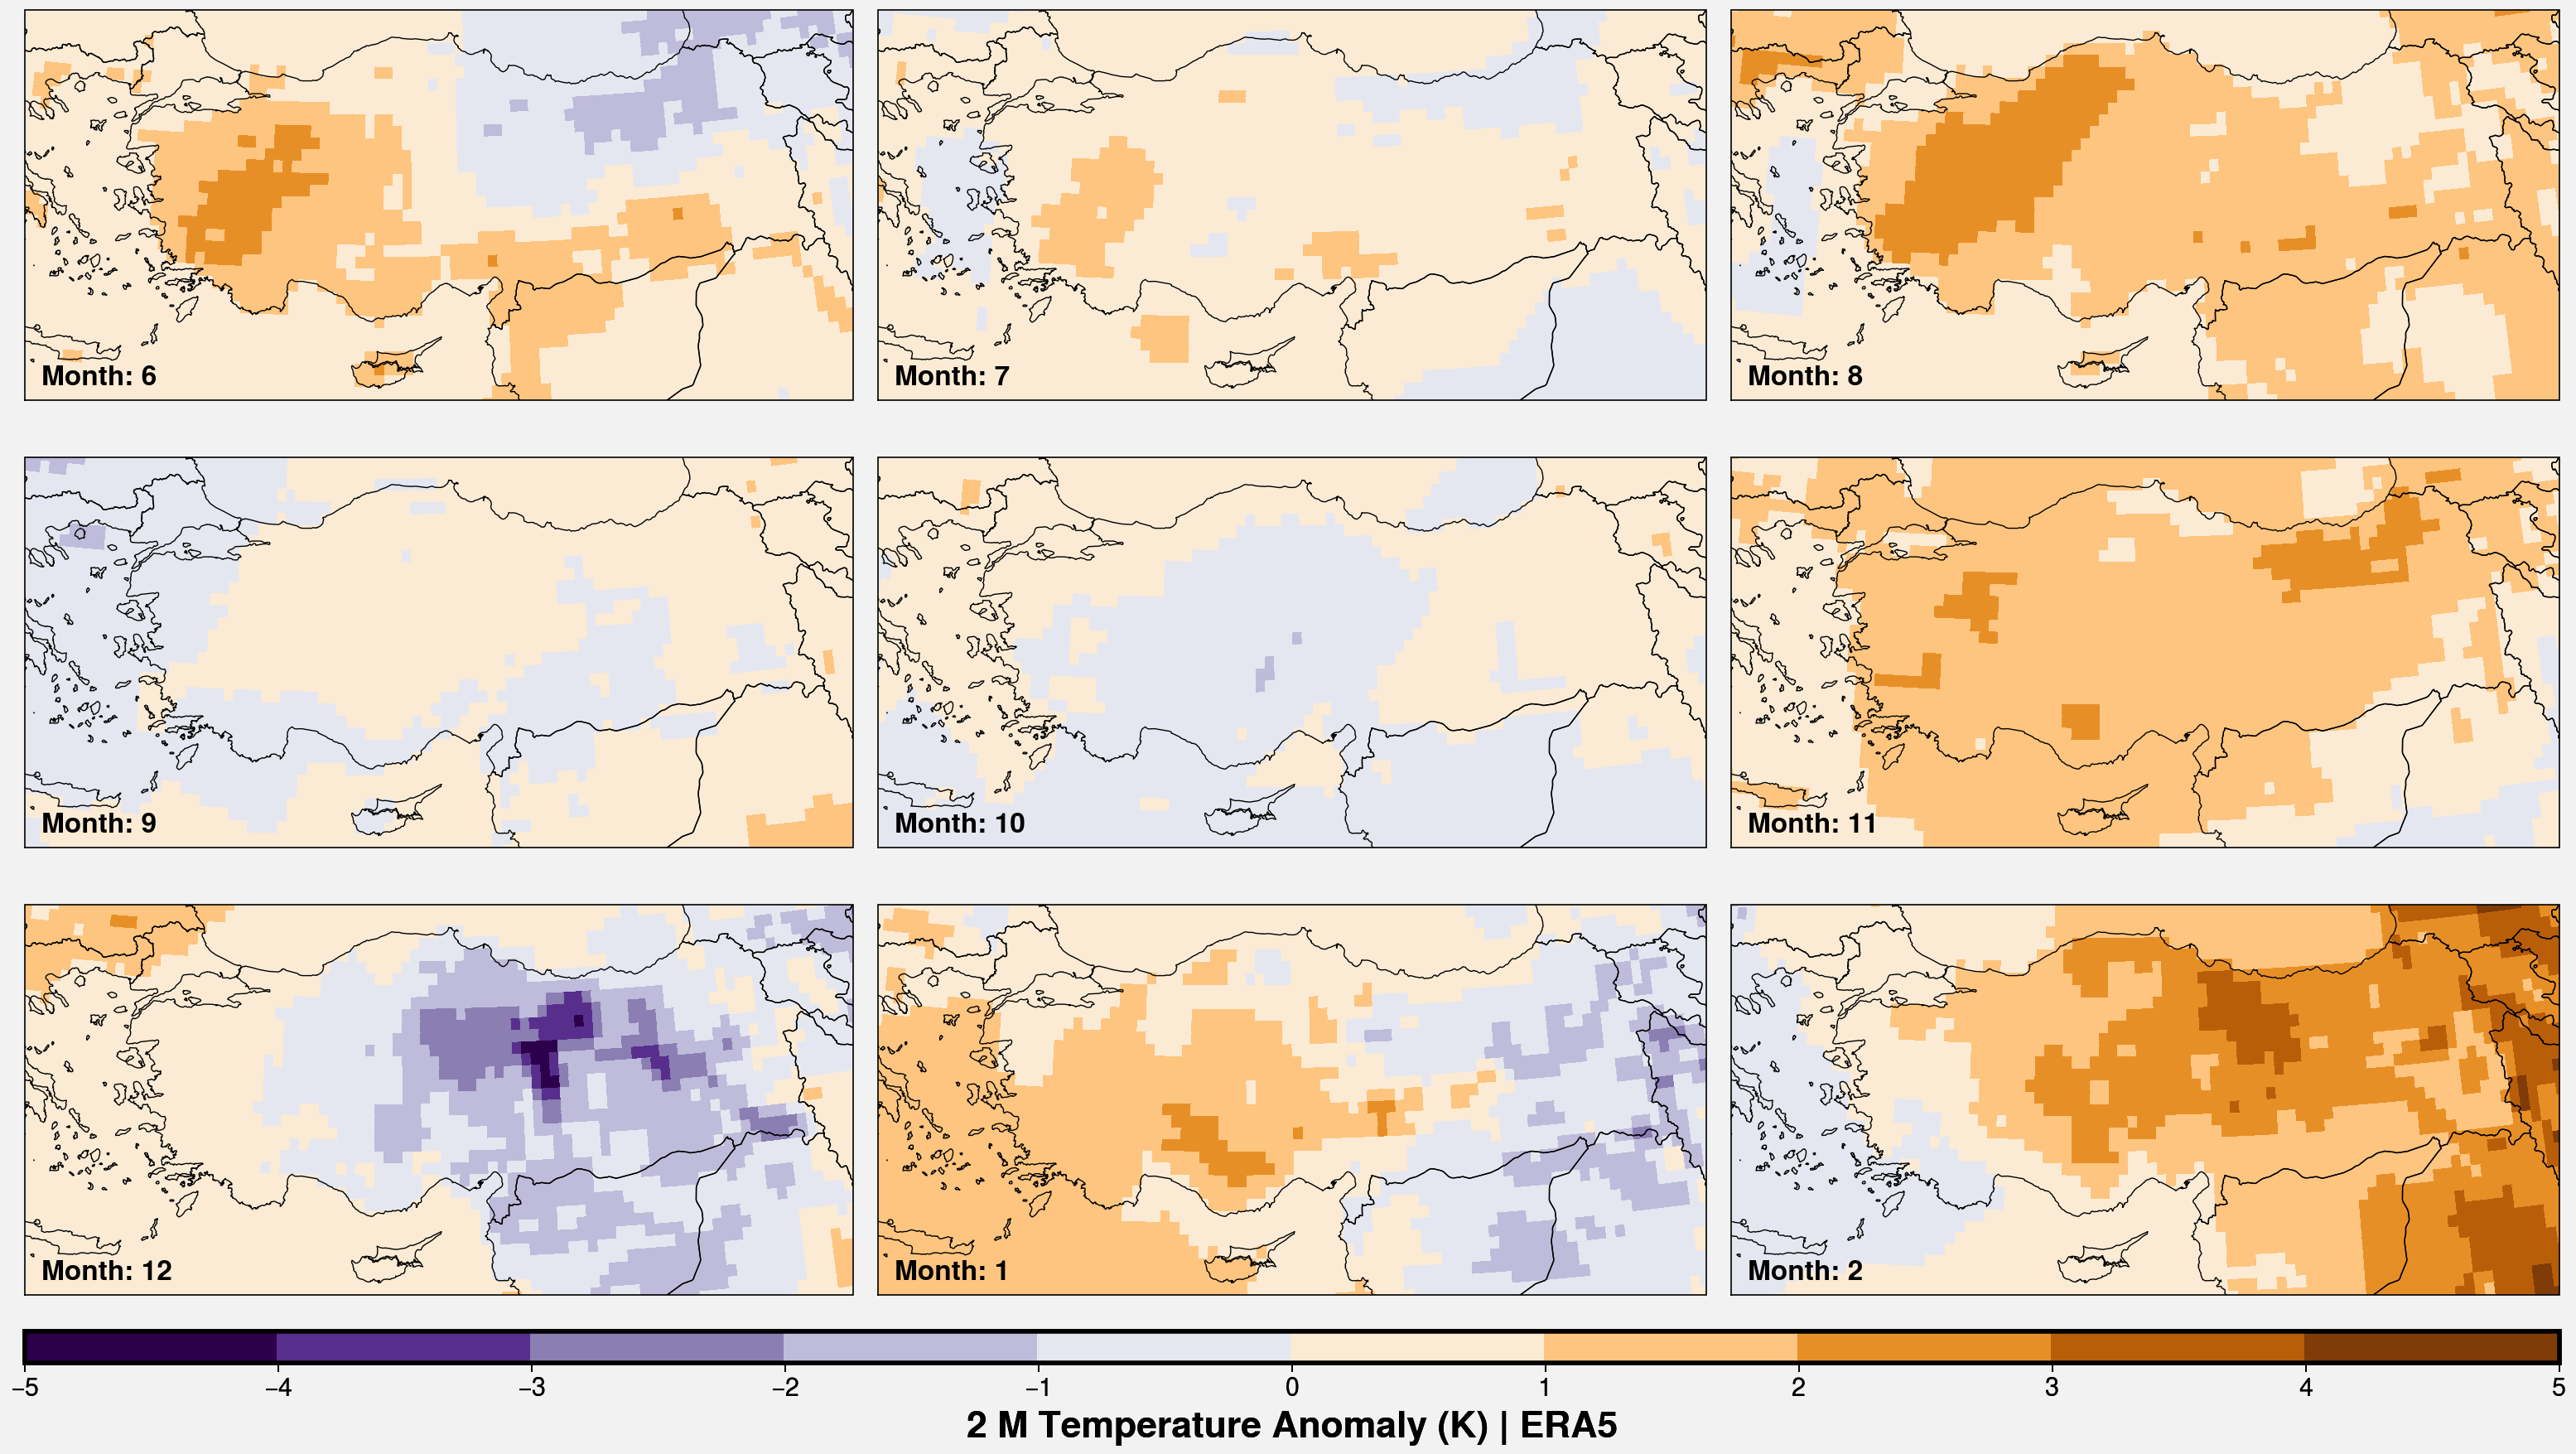

In [276]:
util.plot_anom_map(anom_pp, var_merged, cmap, vmin, vmax, norm, ticks,
                   crs_data, graphic_no, util.graph_field_map[var_merged], method, difference_method, fig_array, unit)